<a href="https://colab.research.google.com/github/AnujVerma-hub/Facial-Emotion-Recognition/blob/main/FER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib as mlt
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
import os

# Preparing Dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!unzip '/content/drive/MyDrive/archive (1).zip'

Archive:  /content/drive/MyDrive/archive (1).zip
  inflating: fer2013.csv             


In [5]:
import pandas as pd
x = pd.read_csv('/content/fer2013.csv')
print(x.shape)

(35887, 3)


In [6]:
print(x.shape)
x.Usage.value_counts()

(35887, 3)


,count
Usage,
Training,28709
PublicTest,3589
PrivateTest,3589


In [7]:
y = x.values[:,0]
pixels = x.values[:,1]
print(type(pixels))
print(len(pixels))
print(len(pixels[0]))
print(pixels[10][10])

<class 'numpy.ndarray'>
35887
8287
3


In [8]:
p = pixels[10].split(' ')
print(len(p))

2304


In [9]:
X = np.zeros((pixels.shape[0], 48*48))
for ix in range(X.shape[0]):
    p = pixels[ix].split(' ')
    for iy in range(X.shape[1]):
        X[ix,iy] = int(p[iy])

In [10]:
temp = X

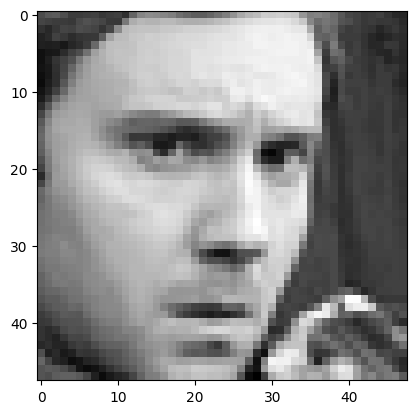

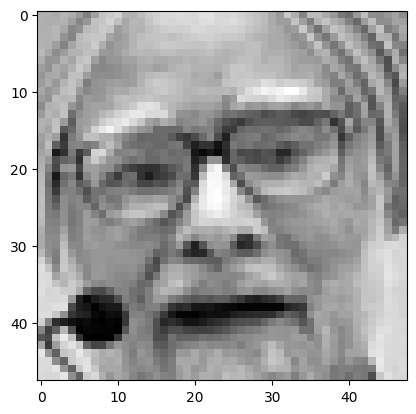

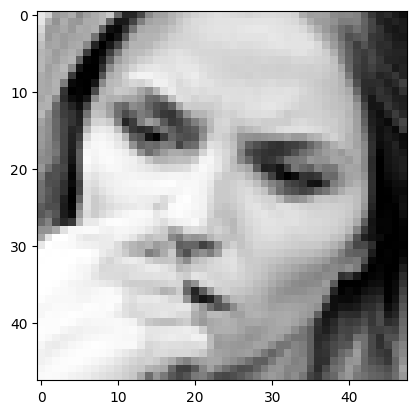

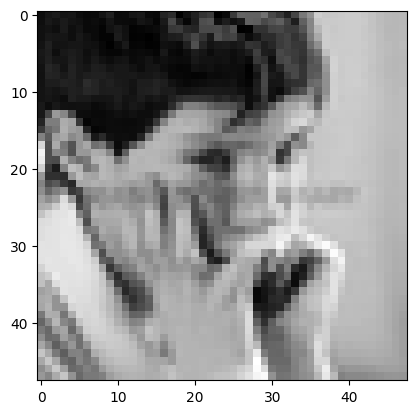

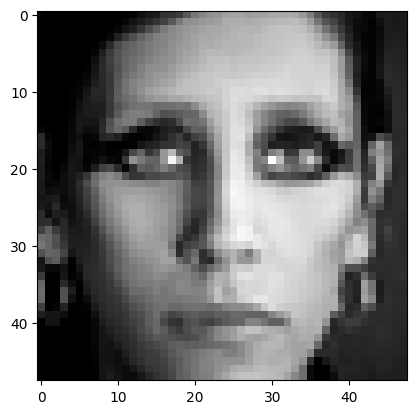

In [11]:
for ix in range(5):
    plt.figure(ix)
    plt.imshow(temp[ix].reshape((48,48)), interpolation="none", cmap="grey")
plt.show()

In [12]:
X

array([[ 70.,  80.,  82., ..., 106., 109.,  82.],
       [151., 150., 147., ..., 193., 183., 184.],
       [231., 212., 156., ...,  88., 110., 152.],
       ...,
       [ 17.,  17.,  16., ..., 154., 133., 113.],
       [ 30.,  28.,  28., ...,  35.,  30.,  28.],
       [ 19.,  13.,  14., ..., 189., 199., 201.]])

In [13]:
X = X/255.0

In [14]:
X

array([[0.2745098 , 0.31372549, 0.32156863, ..., 0.41568627, 0.42745098,
        0.32156863],
       [0.59215686, 0.58823529, 0.57647059, ..., 0.75686275, 0.71764706,
        0.72156863],
       [0.90588235, 0.83137255, 0.61176471, ..., 0.34509804, 0.43137255,
        0.59607843],
       ...,
       [0.06666667, 0.06666667, 0.0627451 , ..., 0.60392157, 0.52156863,
        0.44313725],
       [0.11764706, 0.10980392, 0.10980392, ..., 0.1372549 , 0.11764706,
        0.10980392],
       [0.0745098 , 0.05098039, 0.05490196, ..., 0.74117647, 0.78039216,
        0.78823529]])

In [15]:
y

array([0, 0, 2, ..., 0, 3, 2], dtype=object)

# Spliting Dataset

In [16]:
X_train = X[0:28709,:]
y_train = y[0:28709]
X_valid = X[28709:32298,:]
y_valid = y[28709:32298]
print(X_train.shape,y_train.shape)
print(X_valid.shape,y_valid.shape)

X_test = X[32298:35887,:]
y_test = y[32298:35887]
print(X_test.shape,y_test.shape)

(28709, 2304) (28709,)
(3589, 2304) (3589,)
(3589, 2304) (3589,)


# Data Augmentation

In [17]:
X_train = X_train.reshape(X_train.shape[0], 48, 48, 1)
X_test = X_test.reshape(X_test.shape[0], 48, 48, 1)
X_valid = X_valid.reshape(X_valid.shape[0], 48, 48, 1)
X_valid.shape

(3589, 48, 48, 1)

In [18]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_valid = to_categorical(y_valid)
y_test = to_categorical(y_test)

In [19]:
num_classes = 7
emotion_labels = ["Angry","Digust","Fear","Happy","Sad","Surprise","Neutral"]
classes = np.array(("Angry","Digust","Fear","Happy","Sad","Surprise","Neutral"))


In [20]:
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Dropout,BatchNormalization,Input

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

datagen.fit(X_train)

# Building a Model

In [22]:
model = Sequential()

model.add(Conv2D(64,kernel_size=(3,3),activation="relu",padding="same",input_shape=(48,48,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,kernel_size=(3,3),activation="relu",padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(256,kernel_size=(3,3),activation="relu",padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(256,activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(7,activation="softmax"))

print(model.summary())

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 48, 48, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     2,359,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,732,807 (10.42 MB)

 Trainable params: 2,731,911 (10.42 MB)

 Non-trainable params: 896 (3.50 KB)

None


# Model training

In [23]:
from keras.callbacks import ReduceLROnPlateau,EarlyStopping
es = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)
r_reducer = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, min_delta=0.0001, patience=10, verbose=1)

In [24]:
optimizer = keras.optimizers.Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999,epsilon=1e-7)
model.compile(loss="categorical_crossentropy",optimizer=optimizer,metrics=["accuracy"])

In [25]:
history = model.fit(X_train,y_train,epochs=40, batch_size=64,validation_data=(X_valid,y_valid),callbacks=[es,r_reducer])

Epoch 1/40
449/449 ━━━━━━━━━━━━━━━━━━━━ 25s 35ms/step - accuracy: 0.2290 - loss: 2.3937 - val_accuracy: 0.2502 - val_loss: 1.7562 - learning_rate: 0.0010
Epoch 2/40
449/449 ━━━━━━━━━━━━━━━━━━━━ 26s 16ms/step - accuracy: 0.2686 - loss: 1.7494 - val_accuracy: 0.2742 - val_loss: 1.7573 - learning_rate: 0.0010
Epoch 3/40
449/449 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.2936 - loss: 1.6913 - val_accuracy: 0.3539 - val_loss: 1.6035 - learning_rate: 0.0010
Epoch 4/40
449/449 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.3205 - loss: 1.6454 - val_accuracy: 0.4179 - val_loss: 1.6051 - learning_rate: 0.0010
Epoch 5/40
449/449 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.3446 - loss: 1.6107 - val_accuracy: 0.2867 - val_loss: 1.7321 - learning_rate: 0.0010
Epoch 6/40
449/449 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.3364 - loss: 1.5960 - val_accuracy: 0.3232 - val_loss: 1.5680 - learning_rate: 0.0010
Epoch 7/40
449/449 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.3731 - los

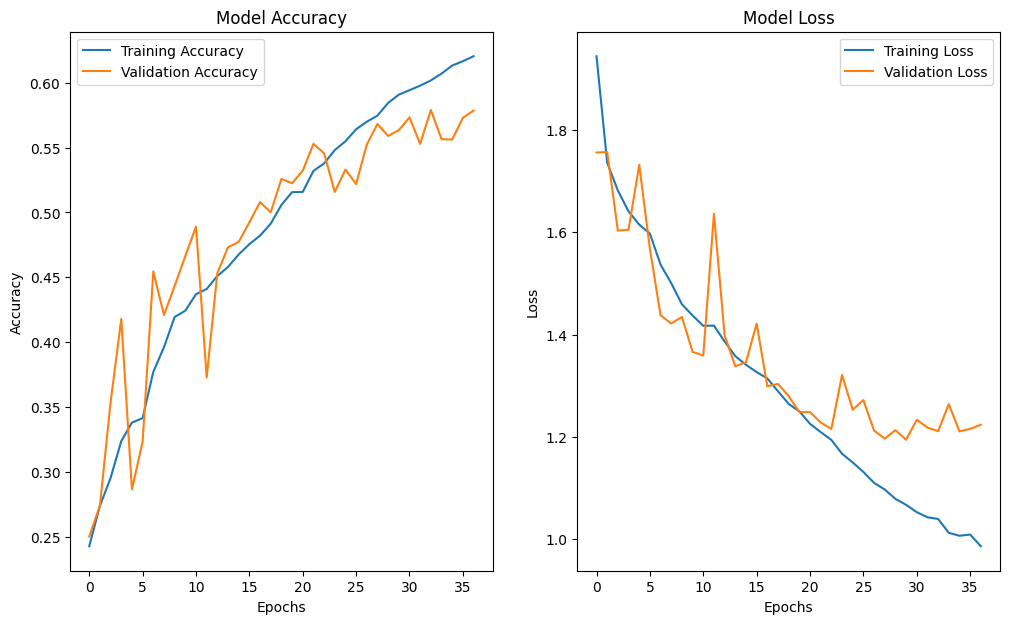

In [29]:
plt.figure(figsize=(12,7))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')
plt.savefig('Model plot.png',dpi=300)
plt.show()